In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

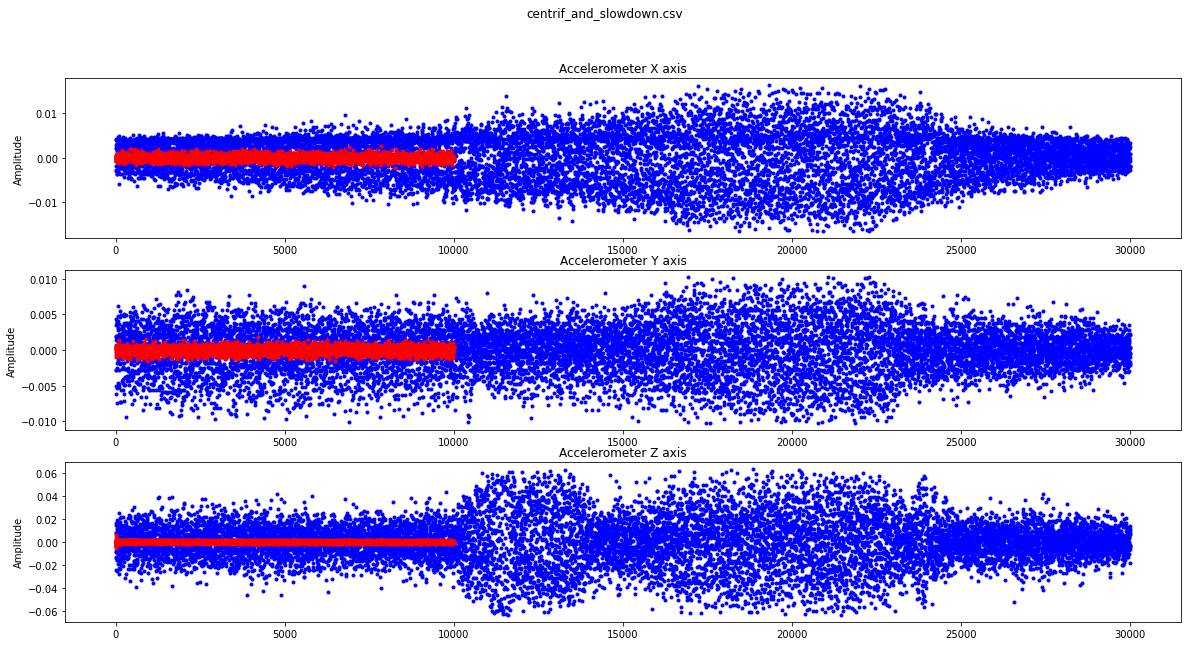

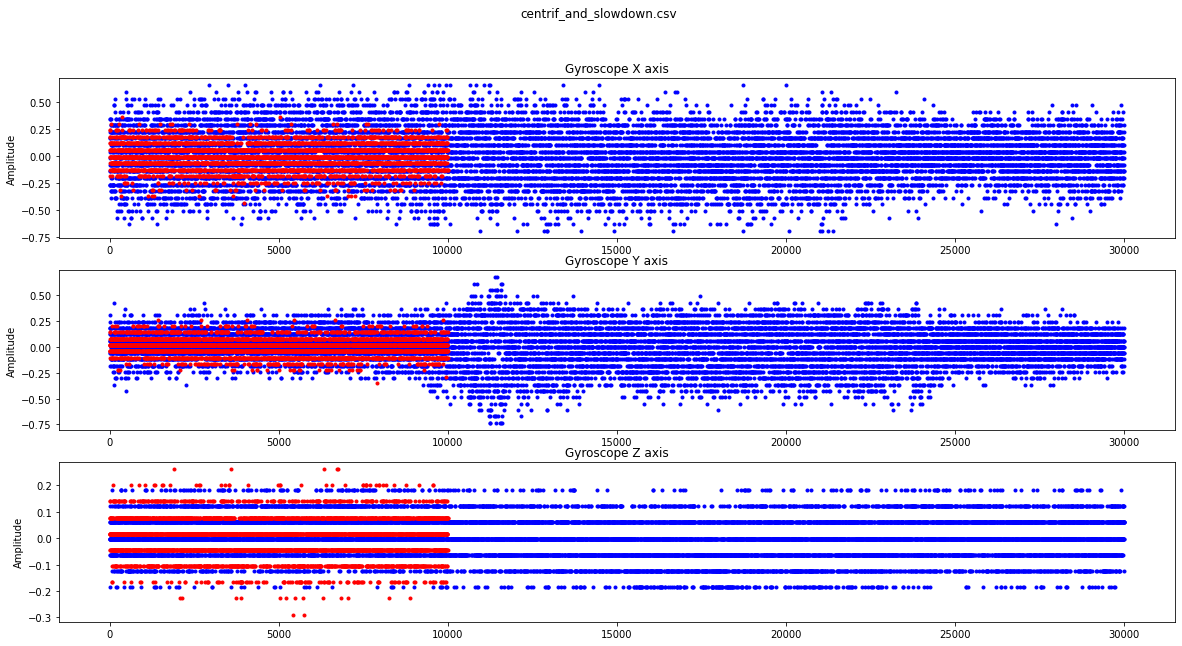

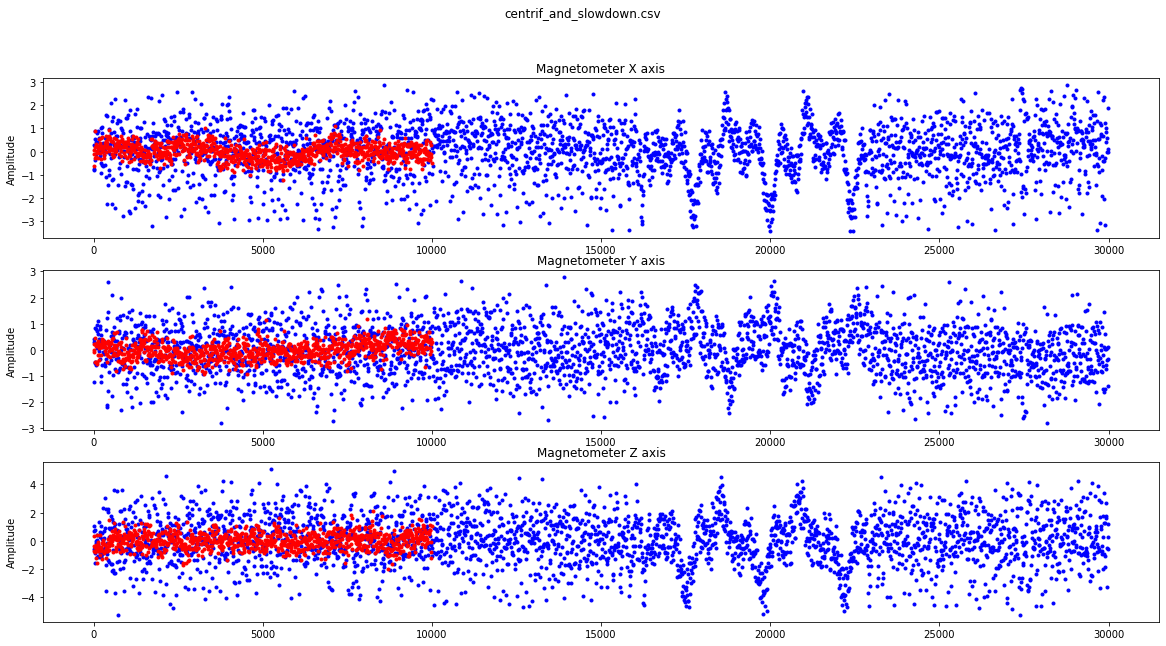

In [3]:
# Select which file you want to analyze

data_filename = 'centrif_and_slowdown.csv'
# data_filename = 'collect_water_and_mainwash.csv'
# data_filename = 'collect_water_and_prewash.csv'
# data_filename = 'mainwash_and_remove_water.csv'
# data_filename = 'start_centrif.csv'


data_on = pd.read_csv('./sensor_data/' + data_filename)
data_off = pd.read_csv('./sensor_data/machine_off.csv')

accelerometer = data_on[data_on['Sensor']=='A'][['X','Y','Z']]
gyroscope = data_on[data_on['Sensor']=='G'][['X','Y','Z']]
magnetometer = data_on[data_on['Sensor']=='M'][['X','Y','Z']]

accelerometer_off = data_off[data_off['Sensor']=='A'][['X','Y','Z']]
gyroscope_off = data_off[data_off['Sensor']=='G'][['X','Y','Z']]
magnetometer_off = data_off[data_off['Sensor']=='M'][['X','Y','Z']]

# substract average
accelerometer -= accelerometer.mean()
gyroscope -= gyroscope.mean()
magnetometer -= magnetometer.mean()

accelerometer_off -= accelerometer_off.mean()
gyroscope_off -= gyroscope_off.mean()
magnetometer_off -= magnetometer_off.mean()

# remove outliers (amplitude > 3 sigma)
accStd = accelerometer.std()
gyrStd = gyroscope.std()
magStd = magnetometer.std()

accelerometer = accelerometer[np.abs(accelerometer) < 3 * accStd]
gyroscope = gyroscope[np.abs(gyroscope) < 3 * gyrStd]
magnetometer = magnetometer[np.abs(magnetometer) < 3 * magStd]

plt.figure(figsize=(20,10))
plt.suptitle(data_filename)
plt.subplot(3,1,1)
plt.title('Accelerometer X axis')
plt.ylabel('Amplitude')
plt.plot(accelerometer.X, 'b.')
plt.plot(accelerometer_off.X,'r.')
plt.subplot(3,1,2)
plt.title('Accelerometer Y axis')
plt.ylabel('Amplitude')
plt.plot(accelerometer.Y, 'b.')
plt.plot(accelerometer_off.Y,'r.')
plt.subplot(3,1,3)
plt.title('Accelerometer Z axis')
plt.ylabel('Amplitude')
plt.plot(accelerometer.Z, 'b.')
plt.plot(accelerometer_off,'r.')
plt.savefig(data_filename[:-4] + '_accelerometer.png')

plt.figure(figsize=(20,10))
plt.suptitle(data_filename)
plt.subplot(3,1,1)
plt.title('Gyroscope X axis')
plt.ylabel('Amplitude')
plt.plot(gyroscope.X, 'b.')
plt.plot(gyroscope_off.X,'r.')
plt.subplot(3,1,2)
plt.title('Gyroscope Y axis')
plt.ylabel('Amplitude')
plt.plot(gyroscope.Y, 'b.')
plt.plot(gyroscope_off.Y,'r.')
plt.subplot(3,1,3)
plt.title('Gyroscope Z axis')
plt.ylabel('Amplitude')
plt.plot(gyroscope.Z, 'b.')
plt.plot(gyroscope_off.Z,'r.')
plt.savefig(data_filename[:-4] + '_gyroscope.png')

plt.figure(figsize=(20,10))
plt.suptitle(data_filename)
plt.subplot(3,1,1)
plt.title('Magnetometer X axis')
plt.ylabel('Amplitude')
plt.plot(magnetometer.X, 'b.')
plt.plot(magnetometer_off.X,'r.')
plt.subplot(3,1,2)
plt.title('Magnetometer Y axis')
plt.ylabel('Amplitude')
plt.plot(magnetometer.Y, 'b.')
plt.plot(magnetometer_off.Y,'r.')
plt.subplot(3,1,3)
plt.title('Magnetometer Z axis')
plt.ylabel('Amplitude')
plt.plot(magnetometer.Z, 'b.')
plt.plot(magnetometer_off.Z,'r.')
plt.savefig(data_filename[:-4] + '_magnetoscope.png')
plt.show()



In [4]:
# print(accelerometer_off.Z.max()- accelerometer_off.Z.min())
# print(accelerometer.Z.max()- accelerometer.Z.min())

print(accelerometer_off.Z.max())
print(accelerometer_off.Z.min())

print(accelerometer.Z[11000:11500].max())
print(accelerometer.Z[11000:11500].min())


# 0.00614977475083071
# -0.00508022524916929
# 0.012533614470284202
# -0.018960385529715795
# lets set the threshold to 0.009

# plt.plot(accelerometer.Z[11000:11500], '.')
# plt.show()



0.00614977475083071
-0.00508022524916929
0.0390761828584084
-0.03514281714159159
